In [25]:
import os
import json
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
TWEETS_SOURCE_FOLDER = '../formated_data/tweet/'
ALL_PLOTICIANS_FILE = '../../assets/all_politicians.json'
TWEETS_STATS_FILE = 'politicians_tweets_stats.csv'

In [38]:
df_tweets_stats = pd.read_csv(TWEETS_STATS_FILE)
parties = df_tweets_stats['party'].unique()

party_colors = {
    'SPD': 'red',
    'CDU': 'black',
    'AfD': 'blue',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'Die Linke': 'purple',
    'CSU': 'lightblue',
    'Fraktionslos': 'grey'
}

party_colors_2 = {
    'SPD': 'tab:red',
    'CDU': 'black',
    'AfD': 'tab:blue',
    'FDP': 'gold',
    'Bündnis 90/Die Grünen': 'tab:green',
    'Die Linke': 'tab:purple',
    'CSU': 'tab:cyan',
    'Fraktionslos': 'tab:gray'
}

In [28]:
with open(ALL_PLOTICIANS_FILE, 'r', encoding='utf-8') as all_ploticians_infile:
    all_politicians = json.load(all_ploticians_infile)

In [29]:
total_tweets = []

for p in all_politicians:
    p_f_path = os.path.join(TWEETS_SOURCE_FOLDER, f'{p["screen_name"]}.json')
    total_tweets += [t for t in json.load(open(p_f_path, 'r', encoding='utf-8'))]

In [30]:
print(f'Total found tweets:  {len(total_tweets)}')

total_unique_tweets = len(list(set([t['id_'] for t in total_tweets])))
print(f'Total unique tweets: {total_unique_tweets}')

# total_unique_tweets2 = list({t['id_']: t for t in total_tweets}.values())
# print(f'Total unique tweets2: {len(total_unique_tweets2)}')

Total found tweets:  295915
Total unique tweets: 286014


In [31]:
all_politicians_ids = [str(p['id']) for p in all_politicians]

total_unique_tweets_by_politicians = len(list(set([t['id_'] for t in total_tweets if t['raw_data']['user_id_str'] in all_politicians_ids])))

print(f'Total unique tweets by politicians: {total_unique_tweets_by_politicians} ({total_unique_tweets_by_politicians / total_unique_tweets * 100} %)')
print(f'Total unique quoted tweets:          {total_unique_tweets - total_unique_tweets_by_politicians} ({100 - (total_unique_tweets_by_politicians / total_unique_tweets * 100)} %)')

Total unique tweets by politicians: 254861 (89.10787583824568 %)
Total unique quoted tweets:          31153 (10.892124161754325 %)


In [32]:
df_tweets_per_party = df_tweets_stats[['party', 'tweets_by_politician']]
print(f'Mean tweets per politician:   {df_tweets_per_party["tweets_by_politician"].mean()}')
print(f'Median tweets per politician: {df_tweets_per_party["tweets_by_politician"].median()}')

Mean tweets per politician:   462.4736842105263
Median tweets per politician: 208.0


In [33]:
df_lang = df_tweets_stats[['total_german_tweets', 'german_tweets_by_politician']]

print(f'Number of German tweets by politicians: {df_lang["german_tweets_by_politician"].sum()}')
print(f'{df_lang["german_tweets_by_politician"].sum() / total_unique_tweets_by_politicians * 100}%')

Number of German tweets by politicians: 232973
91.41178917135223%


In [54]:
print(df_tweets_stats['party'].value_counts())

SPD                      120
CDU                      119
AfD                       81
FDP                       75
Bündnis 90/Die Grünen     64
Die Linke                 61
CSU                       28
Fraktionslos               3
Name: party, dtype: int64


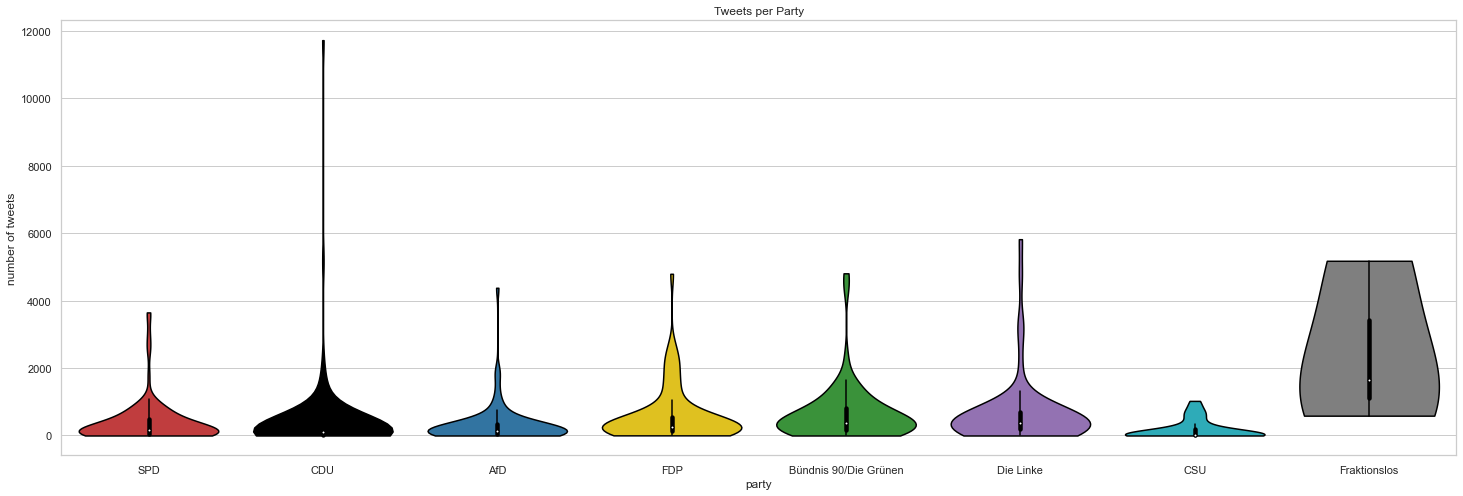

In [39]:
df_tweets_per_party = df_tweets_stats[['party', 'tweets_by_politician']]
sns.set_theme(style="whitegrid")
fig = plt.subplots(figsize=(25, 8))
chart = sns.violinplot(data=df_tweets_per_party,
                       x='party',
                       y='tweets_by_politician',
                       scale='width',
                       cut=0,
                       order=df_tweets_stats['party'].value_counts().index,
                       palette=party_colors_2)
chart.set(ylabel='number of tweets',
          title='Tweets per Party')
plt.show()

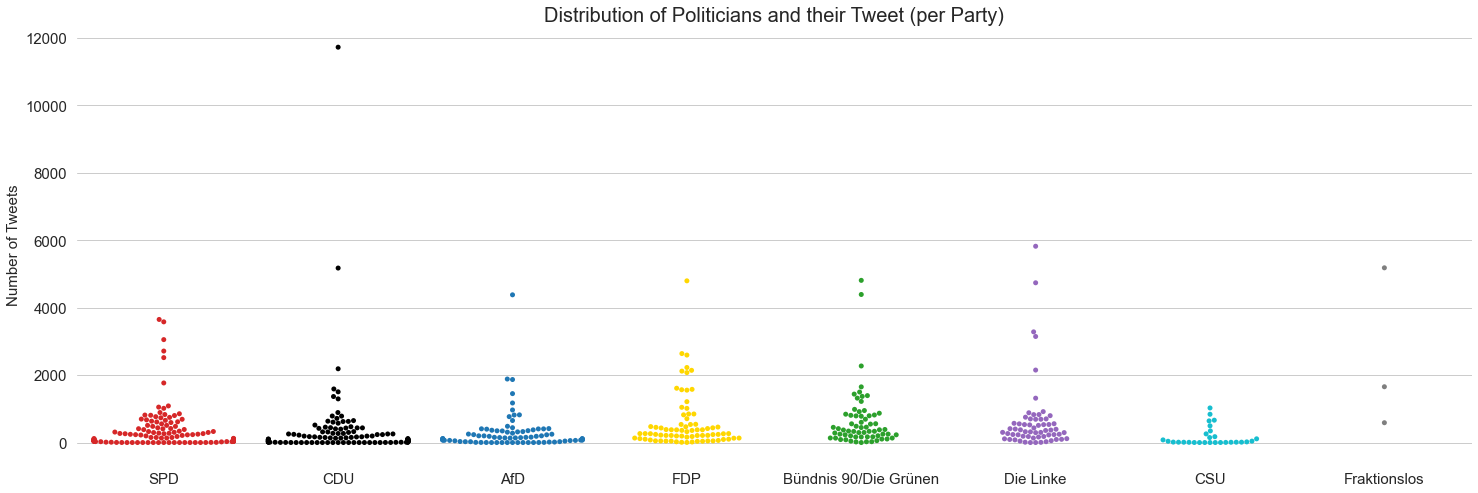

In [53]:
df_tweets_per_party = df_tweets_stats[['party', 'tweets_by_politician']]
sns.set_theme(style="whitegrid")
fig = plt.subplots(figsize=(25, 8))
chart = sns.swarmplot(data=df_tweets_per_party,
                       x='party',
                       y='tweets_by_politician',
                       order=df_tweets_stats['party'].value_counts().index,
                       palette=party_colors_2)
plt.xlabel(None)
plt.ylabel('Number of Tweets', fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.title('Distribution of Politicians and their Tweet (per Party)', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

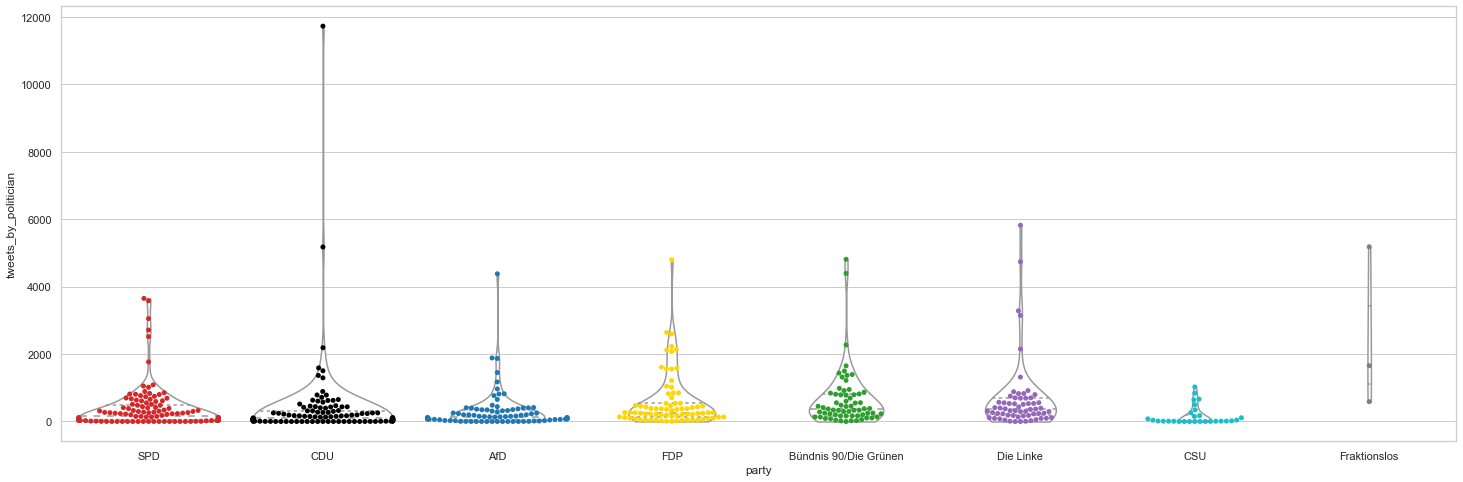

In [41]:
df_tweets_per_party = df_tweets_stats[['party', 'tweets_by_politician']]
sns.set_theme(style="whitegrid")
fig = plt.subplots(figsize=(25, 8))
# box = sns.boxplot(data=df_tweets_per_party,
#                        x='party',
#                        y='tweets_by_politician',
#                        order=df_tweets_stats['party'].value_counts().index,
#                        palette=party_colors)
violin = sns.violinplot(data=df_tweets_per_party,
                       x='party',
                       y='tweets_by_politician',
                       cut=0,
                       scale='count',
                       inner='quartile',
                       bw='scott',
                       order=df_tweets_stats['party'].value_counts().index,
                       color='white')
swarm = sns.swarmplot(data=df_tweets_per_party,
                      x='party',
                      y='tweets_by_politician',
                      order=df_tweets_stats['party'].value_counts().index,
                      palette=party_colors_2)
chart.set(ylabel='number of tweets',
          title='Tweets per Party')
plt.show()